# 머신러닝
- 인공지능의 한 분야
- 컴퓨터가 학습할 수 있도록 하는 알고리즘과 기술을 개발하는 분야
- 표현(데이터평가)과 일반화(아직 알 수 없는 데이터에 대한 처리)
- 데이터를 통한 학습 모델을 도출하고 새로운 데이터에 대한 추론과 패턴 예측에 활용

## 머신러닝의 범주
### 지도학습(Supervised learning)
- 데이터의 측정된 특징과 데이터와 관련된 레이블 사이의 관계를 모델링하는 것

### 비지도학습(Unsupervised learning)
레이블을 참조하지 않고 데이터세트의 특징을 모델링하는 것

#### 기온과 습도 : 측정 가능 = 특징
#### 불쾌지수 : 사람의 주관적인 느낌 = 레이블

#### 레이블 없이 기온과 습도만 있으면 비지도 학습 - 군집호

# 회귀분석
- 레이블이 연속적인 수치형 데이터일 경우

# 분류 분석
- 레이블이 범주, 클래스 등 이산적인 데이터일 경우

# 2차시. Scikit Learn

## 머신러닝
- 데이터로부터 모델을 만드는 학습 과정

## scikit-Learn
- 데이터를 데이터 테이블 관점으로 이해함
- 기본 테이블은 2차원 데이터 구조, 엑셀의 시트와 동일
- 행 = 데이터세트의 개별요소(개체) - 표본
- 열 = 개별 요소의 특징(요소) - 특징

## Scikit Learn API 사용단계
- Scikit Learn API에서 적절한 추정기 클래스를 임포트해서 사용하고자 하는 델을 선택한다.
- 클래스로부터 인스턴스를 생성하고 초모수를 설정한다
- 데이터를 특정배열(X)과 대상배열(Y)로 준비한다.
- 모델 인스턴스의 fit() 메소드를 호출해서 데이터를 학습한다.
- 정확도를 확인하고 새로운 데이터에 모델을 적용한다.

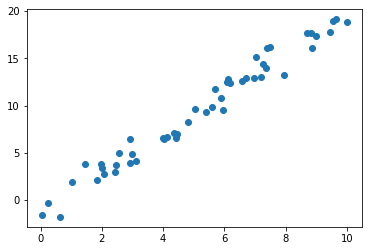

In [4]:
### 간단한 회귀 분석
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(43)
x = 10 * mg.rand(50)
y = 2 *x -1 + rng.randn(50)
plt.scatter(x, y);

* 실제 데이터와 모델의 오차를 최소로하는 선형식의 계수를 찾는 것이 우리의 목표

#### 모델 클래스 선택
- 간단한 선형 회귀 모델을 사용하고자 한다면, 선형 회귀 클래스를 임포트 하면 됨

In [5]:
from sklearn.linear_model import LinearRegression

#### 모델 초모수 선택
* LinearRegression 클래스에 절편 옵션을 사용하는 model 인스턴스를 생성하는 과정

In [8]:
model = LinearRegression(fit_intercept = True)
# 절편 사용 여부
# 절편 사용 O = True

#### 데이터 차원 변경

In [9]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [10]:
X = x.reshape(50, 1)
X.shape

(50, 1)

#### 모델에 데이터 적용

In [11]:
model.fit(X, y)
# 모델에 따라 결정된 여러 가지 내부 계산
# 계산 결과는 모델 인스턴스 속성에 저장

LinearRegression()

#### 모델 확인

In [12]:
print(model.coef_)
print(model.intercept_)

[2.09034315]
-1.289416727476377


#### 모델 정확도 확인
- 1에 가까운 값을 나타낼 수록 정확도가 높다고 판단

In [13]:
model.score(X, y)

0.9709591201122889

#### 모델 시각화

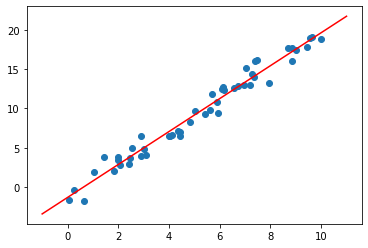

In [14]:
xfit = np.linspace(-1, 11)
plt.scatter(x, y)
plt.plot(xfit, model.coef_ * xfit + model.intercept_, '-r')

# 3차시 회귀분석 심화

- 현실적으로 데이터가 선형으로 표현되지 않는 경우에는 2차시에서 배운 간단한 선형 회귀 모델의 정확도가 많이 떨어지게 됨.

### 성과가 저조하다면 어떻게 계산할 것인가?

#### 모델의 성과 개선 방법
- 더 복잡하거나 더 유연한 모델
- 덜 복잡하거나 덜 유연한 모델
- 더 많은 훈련 표본 수집
- 각 표본에 특징을 추가하기 위해 더 많은 데이터 수집

* 예상했던 결과가 나오지 않을 수도 이싿.
* 더 복잡하고, 더 많은 데이터를 사용해도 정확하지 않을 수 있음

### 편향-분산 트레이드 오프

#### 파이프 라인
- 전처리 프로그램과 선형 회귀 모델을 묶어주는 프로그램

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree = 2, **kwargs):
    return make_pipeline(PolynomialFeatrues(degree), LinearRegression(**kwargs))

#### 데이터 생성

In [16]:
import numpy as np
def make_data(N, err = 1.0, rseed = 1):
    rng = np.random.RandomState(rseed)
    X = rng.rand(N) ** 2
    y = 10-1./(X+0.1)
    if err>0:
        y += err * rng.randn(N)
        return X, y
    
X, y = make_data(40)

#### 데이터 시각화

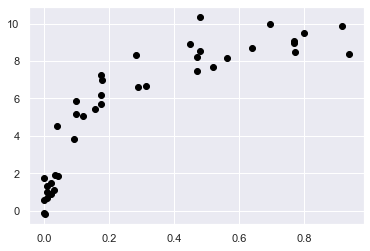

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn;
seaborn.set()

X_test = np.linspace(-0.1, 1.1, 500)
plt.scatter(X, y, color = 'black')
axis = plt.axis()

#### 데이터 적합

NameError: name 'PolynomialFeatrues' is not defined

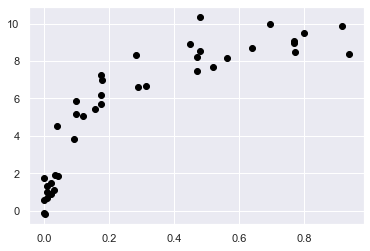

In [19]:
plt.scatter(X, y, color = 'black')

for degree in [1, 2, 3]:
    model = PolynomialRegression(degree)
    model.fit(X[:, np.newaxis], y)
    y_test = model.predict(X_test[:, np.newaxis])
    plt.plot(X_test, y_test, label = f'Degree={degree}')
    
plt.axis([-0.1, 1.0, -2, 12])
plt.legend(loc = 'best');

#### 데이터 검증 곡선

In [22]:
from sklearn.model_selection import validation_curve
degree = np.arange(1, 10)

train_score, val_score = validation_curve(PolynomialRegression(), X[:, np.newaxis], y, 'polynomialfeatrues_degree', degree, cv = 7)

plt.plot(degree, np.median(train_score, 1), color = 'blue', label = 'training score')
plt.plot(degree, np.median(val_score, 1), color = 'red', label = 'validation score')
plt.legend(loc = 'best')
plt.ylim(0, 1)
plt.xlabel('degree')
         

NameError: name 'PolynomialFeatrues' is not defined

In [ ]:
- 1~3차식: 훈련 점수와 검정 점수가 함께 상승
- 4차식 이상: 검정 점수 하락, 과적합 ㅂ